# **Problem 4:  Extracting Relevant Colors from an Image**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# A.

Dominant colors for palette size 5:
[[180.39358316 121.89857484  75.95373653]
 [ 26.58617585  23.30254195  23.34111491]
 [239.76660788 236.72036057 231.50244954]
 [ 81.88831087  38.50165743  13.30399961]
 [139.51        65.67779089  14.78794266]]


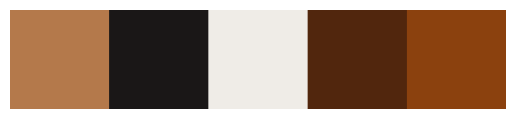

Dominant colors for palette size 7:
[[ 60.44767503  27.67749452  10.64240253]
 [194.7415025  136.57762938  91.19071786]
 [141.99638518  63.6671331    9.86786072]
 [241.2296146  238.62515213 233.86288032]
 [101.05489515  48.03415921  14.52821557]
 [157.79934272  98.45183099  52.64253521]
 [ 23.5865203   23.30417838  25.17791959]]


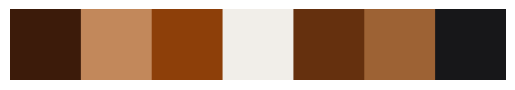

Dominant colors for palette size 9:
[[142.19029752  63.70563052   9.9385237 ]
 [ 23.58044797  23.28536796  25.14251294]
 [200.36171362 134.38626013  83.1404863 ]
 [244.21866784 242.22392638 238.33873795]
 [ 60.67107221  27.71798775  10.57125558]
 [104.21928429  84.72902584  71.07852883]
 [165.33578712  98.91777087  47.27716888]
 [165.64020336 154.78607743 143.52835354]
 [102.74739177  46.85237947  11.47343246]]


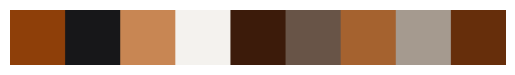

In [3]:
def load_image_data(file_path):
    return np.loadtxt(file_path, dtype=int)

# Color clustering using KMeans
def find_dominant_colors(data, k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    return kmeans.cluster_centers_

def display_palette(colors):
    palette = np.zeros((100, 100 * len(colors), 3), dtype=int)
    for i, color in enumerate(colors):
        palette[:, i * 100: (i + 1) * 100] = color
    plt.imshow(palette)
    plt.axis('off')
    plt.show()

image_data = load_image_data('Q4_us_president.txt')
pixels = image_data.reshape(-1, 3)  

# Finding the dominant colors for different palette sizes
palette_sizes = [5, 7, 9]
for j in palette_sizes:
    dominant_colors = find_dominant_colors(pixels, j)
    print(f"Dominant colors for palette size {j}:")
    print(dominant_colors)
    display_palette(dominant_colors)

# B.

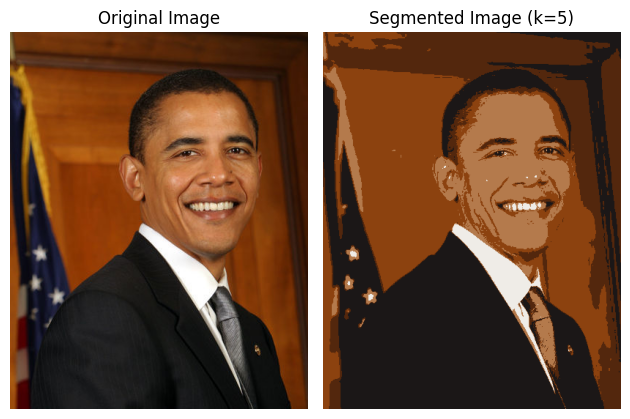

In [4]:
def reconstruct_image(image_data, rows, cols):
    return image_data.reshape((rows, cols, 3))

# Identifying dominant colors
def get_dominant_colors(image, k):
    pixels = image.reshape((-1, 3)) 
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(pixels)
    return kmeans.cluster_centers_.astype(int)  

# Image segmentation
def segment_image(image, dominant_colors):
    pixels = image.reshape((-1, 3))
    distances = np.linalg.norm(pixels[:, np.newaxis] - dominant_colors, axis = 2)
    closest_colors = np.argmin(distances, axis = 1)
    return dominant_colors[closest_colors].reshape(image.shape)

rows, cols = 516, 407

image_data = load_image_data('Q4_us_president.txt')
image = reconstruct_image(image_data, rows, cols)

# Number of dominant colors
k = 5  
dominant_colors = get_dominant_colors(image, k)
segmented_image = segment_image(image, dominant_colors)

plt.subplot(1, 2, 1)  
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.axis('off')

plt. tight_layout()
plt.show()

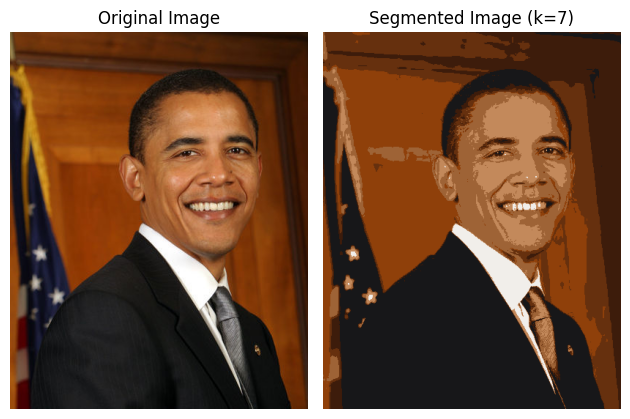

In [5]:
# Number of dominant colors
k = 7  
dominant_colors = get_dominant_colors(image, k)
segmented_image = segment_image(image, dominant_colors)

plt.subplot(1, 2, 1)  
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.axis('off')

plt. tight_layout()
plt.show()

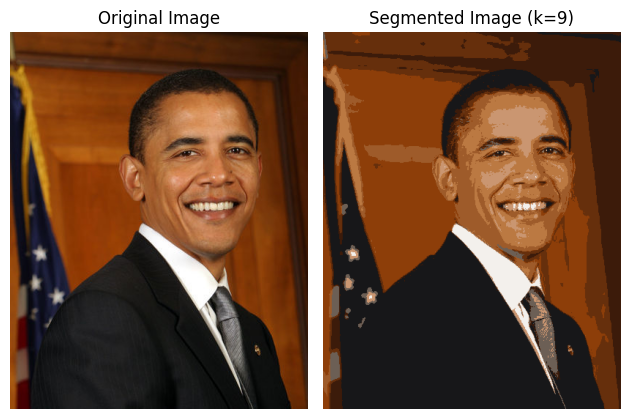

In [6]:
# Number of dominant colors
k = 9  
dominant_colors = get_dominant_colors(image, k)
segmented_image = segment_image(image, dominant_colors)

plt.subplot(1, 2, 1)  
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.axis('off')

plt. tight_layout()
plt.show()